In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix


# Home Assignment 1 - Regression and Classification Models

Aim:

    Students should provide the best possible regression and classification models using Decision Trees and Linear models
    Models should examine different hyperparameters and select the best one [Remember: everything else being similar, the simplest models should be prefered]
    It is expected a full testing and validation cycle of model selection and evaluation

Objective 1

    Produce the best regression model for critical_temp (Dependent Variable)

Objective 2

    Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases


#### 0.1. Data Preparation

In [2]:
# Load data
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

In [3]:
# Check data
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.0
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.0
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.5
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.0
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.0


In [4]:
# Check if any column has a missing value overall (not per row)
print(df.isnull().values.any())

False


**Note to self:** 
To scale or not to scale -  Algorithms that Don't Require Scaling:

    Tree-Based Algorithms: Decision trees, random forests, and gradient boosting algorithms (e.g., XGBoost) are not sensitive to feature scaling because they make decisions based on feature thresholds.
    Naive Bayes: Naive Bayes classifiers are not affected by feature scaling because they estimate class probabilities based on feature distributions.

#### 0.2: Explorative Data Analysis

Before splitting the data, exploratory data analysis (EDA) should be performed to understand the characteristics of the dataset, including checking for linearity.
Visualizations like scatter plots, correlation matrices, or regression diagnostic plots can help assess the linearity between the target variable and predictor variables.

#### 0.3: Data Splitting

In [15]:
# DATA SPLITTING #

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('critical_temp', axis=1), df['critical_temp'], test_size=0.2, random_state=42)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# X_train, y_train: Training data
# X_test, y_test: Test data
# X_val, y_val: Validation data (IVS)

### **Objective 1** - Produce the best regression model for critical_temp (Dependent Variable)

#### 1.1: Model training and testing

In [16]:
# LINEAR REGRESSION MODEL #

# Train model
reg1 = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred1_test = reg1.predict(X_test)


In [18]:
# RIDGE REGRESSION MODEL WITH CROSS-VALIDATION (K-Fold Cross Validation)#

# Train model
reg2 = RidgeCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], max_iter=10000).fit(X_train, y_train) # ridge regression with cross-validation and range of alpha values 0.001, 0.01, 0.1, 1

# Predict on test set
y_pred2_test = reg2.predict(X_test)

# Resulting best alpha from cross-validation
reg2_best_alpha = reg2.alpha_ 

In [20]:
# LASSO REGRESSION MODEL WITH CROSS-VALIDATION (K-Fold Cross Validation) - With Normalised Features#

# Normalise data before LASSO
X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

# Train model
reg3 = LassoCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], max_iter=10000).fit(X_train_norm, y_train) # lasso regression with cross-validation and range of alpha values 0.001, 0.01, 0.1, 1

# Predict on test set
y_pred3_test = reg3.predict(X_test_norm)

# Resulting best alpha from cross-validation
reg3_best_alpha = reg3.alpha_


NOTE: If warnings appear, they are the result of models not being able to converge. This is not due to the fact that the features were not normalised, as the model was tested with both. The model with normalised data was faster so we kept that one (5m vs 30s). The lack of convergence is, however, the result of testing several models with different hyperparameters. The models that did not converge were not used in the final model selection.

In [22]:
# ELASTIC NET REGRESSION MODEL #

# Train model
reg4 = ElasticNetCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=10000).fit(X_train, y_train) # elastic net regression with cross-validation and range of alpha values 0.001, 0.01, 0.1, 1 as well as range of l1_ratio values 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1

# Predict on test set
y_pred4_test = reg4.predict(X_test)

# Resulting best alpha from cross-validation
reg4_best_alpha = reg4.alpha_

# Resulting best l1_ratio from cross-validation
reg4_best_l1_ratio = reg4.l1_ratio_

C:\Users\antun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1848.852506492287, tolerance: 1273.9443178623208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\antun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2661.959234784823, tolerance: 1262.1871103113754
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\antun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47482.99316099798, tolerance: 1273.9443178623208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\antun\AppData\Roaming\Pyt

NOTE: The warnings above are the result of models not being able to converge. This is due to the fact that several models with different hyperparameters were tested. The models that did not converge were not used in the final model selection.

#### 1.2: Results

In [31]:
# Create data frame
df_results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Best Alpha', 'Best l1_ratio'])

# Create data frames for each model
model1 = pd.DataFrame({'Model': 'Linear Regression', 'MSE': mean_squared_error(y_test, y_pred1_test), 'MAE': mean_absolute_error(y_test, y_pred1_test), 'R2': r2_score(y_test, y_pred1_test), 'Best Alpha': '-', 'Best l1_ratio': '-'}, index=[0])
model2 = pd.DataFrame({'Model': 'Ridge Regression', 'MSE': mean_squared_error(y_test, y_pred2_test), 'MAE': mean_absolute_error(y_test, y_pred2_test), 'R2': r2_score(y_test, y_pred2_test), 'Best Alpha': reg2_best_alpha, 'Best l1_ratio': '-'}, index=[1])
model3 = pd.DataFrame({'Model': 'Lasso Regression', 'MSE': mean_squared_error(y_test, y_pred3_test), 'MAE': mean_absolute_error(y_test, y_pred3_test), 'R2': r2_score(y_test, y_pred3_test), 'Best Alpha': reg3_best_alpha, 'Best l1_ratio': '-'}, index=[2])
model4 = pd.DataFrame({'Model': 'Elastic Net Regression', 'MSE': mean_squared_error(y_test, y_pred4_test), 'MAE': mean_absolute_error(y_test, y_pred4_test), 'R2': r2_score(y_test, y_pred4_test), 'Best Alpha': reg4_best_alpha, 'Best l1_ratio': reg4_best_l1_ratio}, index=[3])

# Concatenate the data frames
df_results = pd.concat([df_results, model1, model2, model3, model4], ignore_index=True)

# Print results
df_results

,Model,MSE,MAE,R2,Best Alpha,Best l1_ratio
0,Linear Regression,318.145213,13.492443,0.734182,-,-
1,Ridge Regression,318.141184,13.492088,0.734185,0.01,-
2,Lasso Regression,348.872343,13.963022,0.708509,0.001,-
3,Elastic Net Regression,318.201326,13.477312,0.734135,0.001,1.0


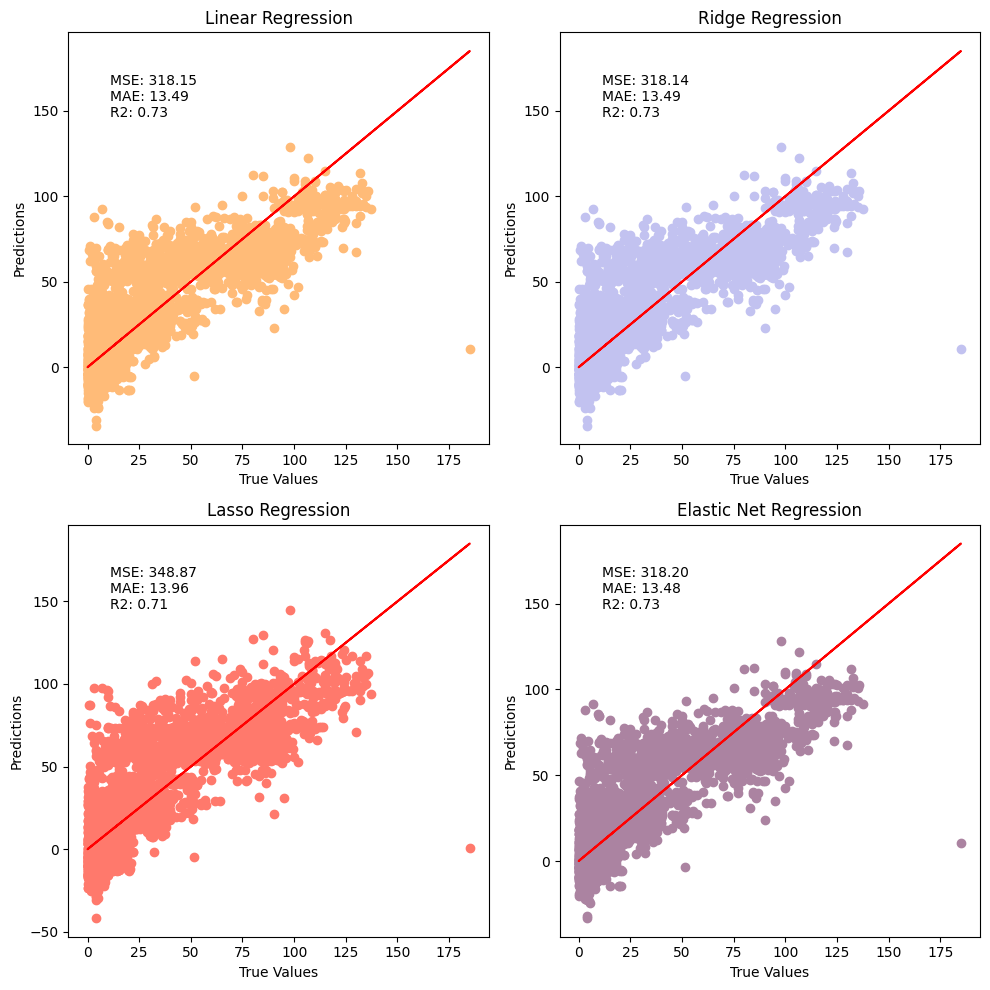

In [43]:
# Plots of the models

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

# List of model names, their predictions, and metrics
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression']
predictions = [y_pred1_test, y_pred2_test, y_pred3_test, y_pred4_test]
metrics = [
    f'MSE: {mean_squared_error(y_test, prediction):.2f}\nMAE: {mean_absolute_error(y_test, prediction):.2f}\nR2: {r2_score(y_test, prediction):.2f}'
    for prediction in predictions
]

# Define a list of pastel colors
pastel_colors = ['#FFBB78', '#C2C2F0', '#FF796C', '#AB83A1']

for i, (model_name, prediction, metric, color) in enumerate(zip(models, predictions, metrics, pastel_colors)):
    ax = axes[i]
    ax.scatter(y_test, prediction, color=color)
    ax.plot(y_test, y_test, color='red')
    ax.set_title(model_name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.text(0.1, 0.9, metric, transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Show plot
plt.tight_layout()
plt.show()

#### 1.3: Validation

In [ ]:
# to be continued

In [ ]:
# Compare the results of the models

# Plot the MSE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in pastel blues
plt.plot(models, mse_val, marker='o', color='lightblue')
plt.plot(models, mse_test, marker='o', color='blue')
plt.title('MSE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the MAE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in light green tones
plt.plot(models, mae_val, marker='o', color='lightgreen')
plt.plot(models, mae_test, marker='o', color='green')
plt.title('MAE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the R2 of both validation and test sets
plt.figure(figsize=(10,5))
# plot in red tones
plt.plot(models, r2_val, marker='o', color='lightcoral')
plt.plot(models, r2_test, marker='o', color='red')
plt.title('R2 of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

### **Objective 2** - Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases

Firstly, we need to transform all the target columns to the binary classification problem instances.

In [84]:
def transform_to_binary(x):
    return 1 if x >= 80 else 0

y_train_bin = y_train.apply(transform_to_binary)
y_val_bin = y_val.apply(transform_to_binary)
y_test_bin = y_test.apply(transform_to_binary)

Now, we'll see what's the ratio of the positive and negative class

In [85]:
y_train_bin.value_counts()

critical_temp
0    11309
1     2242
Name: count, dtype: int64

We can see that the data is imbalanced, we have much more negative (0) observations. Therefore, we will use `F1 score` as our main metric.

#### 2.1 Decision tree

In [86]:
def print_scores(y_true, y_predicted):
    print("The Precision is: %7.4f" % precision_score(y_true, y_predicted))
    print("The Recall is: %7.4f" % recall_score(y_true, y_predicted))
    print("The F1 score is: %7.4f" % f1_score(y_true, y_predicted))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_true, y_predicted))

We will explore different values of the following hyperparameters: `min_samples_leaf`, `max_depth`

In [91]:
min_samples_leaf_values = range(2,50,2)
max_depth_values = range(2,50,2)

results = {"min_samples_leaf": [],"max_depth": [], "F1": []}

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train_bin)
        y_preds = model.predict(X_val)
        f1 = f1_score(y_val_bin, y_preds)

        results["min_samples_leaf"].append(min_samples_leaf)
        results["max_depth"].append(max_depth)
        results["F1"].append(f1)


scores_df = pd.DataFrame(results, index=None)
scores_df = scores_df.sort_values(by="F1", ascending=False)

best_max_depth = scores_df.iloc[0].max_depth
best_min_samples_leaf = int(scores_df.iloc[0].min_samples_leaf)

scores_df

,min_samples_leaf,max_depth,F1
314,6,28,0.802249
434,6,38,0.797732
242,6,22,0.797732
266,6,24,0.797721
386,6,34,0.796226
...,...,...,...
20,42,2,0.294707
21,44,2,0.294707
22,46,2,0.294707
23,48,2,0.294707


We can see that the best combination of hyperparameters is `min_samples_leaf`=6 and `max_depth`=28. When it comes to `min_samples_leaf`, we can be quite sure about this parameter, since all the top 10 best models have it set to 6. However, when it comes to `max_depth`, it varies significantly among the top 10 results and the difference in F1 scores is very small. Therefore, we will explore this parameter a bit deeper.

To make sure our model does not overfit, we will compare the results on the training as well as the validation set.

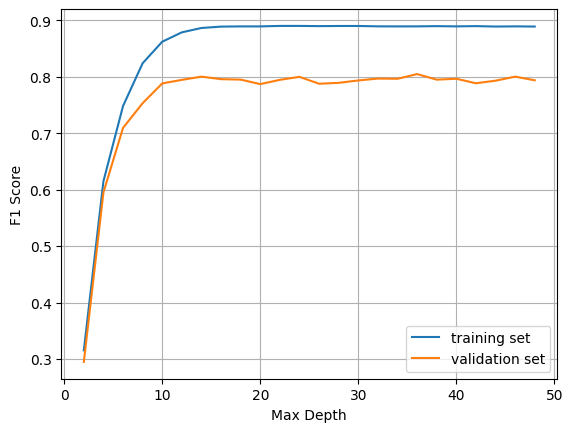

In [112]:
f1_scores_train = []
f1_scores_val = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=best_min_samples_leaf)
    model.fit(X_train, y_train_bin)
    y_preds_train = model.predict(X_train)
    y_preds_val = model.predict(X_val)
    f1_scores_train.append(f1_score(y_train_bin, y_preds_train))
    f1_scores_val.append(f1_score(y_val_bin, y_preds_val))

plt.plot(max_depth_values, f1_scores_train, label='training set')
plt.plot(max_depth_values, f1_scores_val, label='validation set')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

Based on the plot above we can see that the upper bound for the F1 score on the validation set seems to be 0.8. We already get almost the best possible results on the validation set for `max_depth`~14. With increasing the model complexity to bigger max_depth, we don't get any significant improvements. Thus, we can assume that `max_depth`=14 would be enough.

Final model

In [120]:
best_max_depth = 14

model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
model.fit(X_train, y_train_bin)
y_preds_val = model.predict(X_val)
y_preds_test = model.predict(X_test)
print("The F1 score on the validation set is: %7.4f" % f1_score(y_val_bin, y_preds_val))
print("The F1 score on the Independent Validation Set (IVS) is: %7.4f" % f1_score(y_test_bin, y_preds_test))

The F1 score on the validation set is:  0.8007
The F1 score on the Independent Validation Set (IVS) is:  0.7779
